In [6]:
from tensorflow.keras.models import load_model
import os
import re
import numpy as np
from tqdm import tqdm
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model

In [2]:
pathBase = "my_dataset/"          # Directorio de data
pathStudent_models = "models/studentModels/models/"           # Directorio guardado de modelos teacher
pathPropias = pathBase+'imgPropias/'              # Directorio para imagenes fotografias de huerto

etiquetas = ['costra','multiples_enfermedades','oxido','saludable']

In [3]:
StudentModel_pp = load_model(pathStudent_models+'studentModel_comp_1.h5')

In [4]:
def Get_training_data(datafolder):
    print("Loading training data...")
    training_data = []

    filenames = os.listdir(datafolder)
    for filename in tqdm(filenames):
        #Buscar archivos en la carpeta por nombres
        path = os.path.join(datafolder,filename)
    
        image = Image.open(path)        
        image = image.resize((192,192),Image.ANTIALIAS)   #Cambiar tamaño al tamaño utilizado
        
        pixel_array = np.asarray(image)                   # Crear array a partir de la imagen
        training_data.append(pixel_array)

    training_data = np.reshape(training_data,(-1,192,192,3))   # convertir en Numpyarray
    # Normalizar (0 - 1)
    training_data = training_data.astype(np.float32)
    training_data = training_data * (1./255)
    
    return training_data

In [7]:
# Cargando datos no etiquetados
propia_data = Get_training_data(pathPropias)

  0%|          | 0/9 [00:00<?, ?it/s]

Loading training data...


100%|██████████| 9/9 [00:02<00:00,  4.24it/s]


In [8]:
predictions = StudentModel_pp(propia_data)

In [9]:
for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = etiquetas[class_idx]
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: saludable (35.6%)
Example 1 prediction: saludable (37.9%)
Example 2 prediction: costra (42.1%)
Example 3 prediction: saludable (46.4%)
Example 4 prediction: costra (43.0%)
Example 5 prediction: saludable (36.5%)
Example 6 prediction: costra (45.3%)
Example 7 prediction: costra (38.2%)
Example 8 prediction: saludable (43.4%)


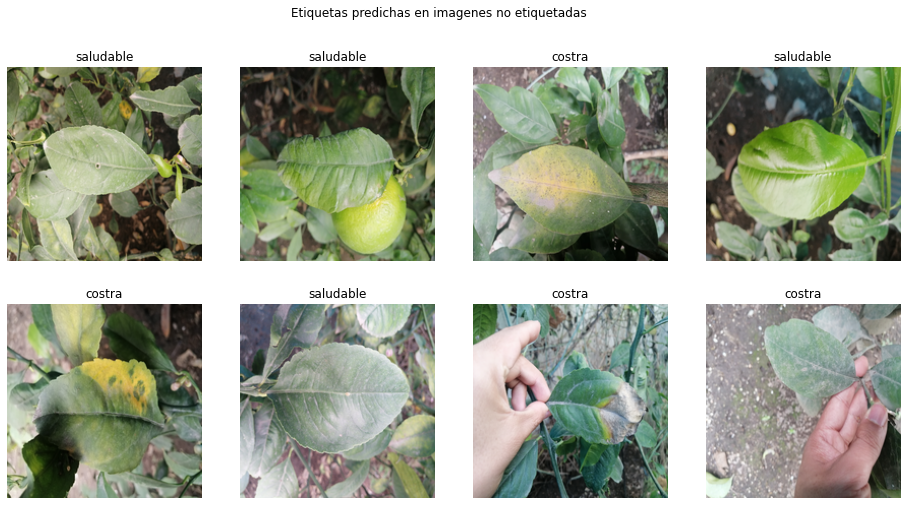

In [15]:
plt.figure(figsize=(16, 8))
plt.suptitle("Etiquetas predichas en imagenes no etiquetadas")

for i, logits in enumerate(predictions):
    if (i<8):
        class_idx = tf.argmax(logits).numpy()
        name = etiquetas[class_idx]
                
        plt.subplot(2, 4, i+1)
        plt.title(name)
        plt.imshow(propia_data[i])
        plt.axis('off')
plt.show()